Importing headers necessary for the plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

Creating a data frame from the file

In [2]:
pwd

'C:\\Users\\vigne\\Documents\\BigData\\GitHub\\06-visualization-homework\\Reach\\jupyter'

In [4]:
df = pd.read_csv('../Aircraft_Landing_Facilities.csv',
                           sep=',',
                           header=0)
df

C:\Users\vigne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,FID,SITE_NO,LAN_FA_TY,LOCID,EFF_DATE,FAA_REGION,FAA_DISTRI,ST_POSTAL,...,ULTRALIGHT,COMM_SERV,AIR_TAXI,LOCAL_OPS,ITIN_OPS,MIL_OPS,Arrivals,Departures,Enplanemen,Passengers
0,-112.194361,35.305500,1002,00831.*A,AIRPORT,CMR,04/03/2014,AWP,LAX,AZ,...,,,000100,001500,004500,,0,0,0,0
1,-91.562667,36.264889,1003,00867.*A,AIRPORT,CVK,04/03/2014,ASW,AOK,AR,...,,,,001100,001100,000100,0,0,0,0
2,-111.935719,35.238344,1004,00831.1*A,AIRPORT,AZ77,04/03/2014,AWP,LAX,AZ,...,,,,,,,0,0,0,0
3,-91.358462,35.288697,1005,00871.1*H,HELIPORT,AR76,04/03/2014,ASW,AOK,AR,...,,,,,,,0,0,0,0
4,-109.067389,35.652056,1006,00833.1*A,AIRPORT,RQE,04/03/2014,AWP,LAX,AZ,...,002,,,001500,003500,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16414,-84.128056,33.820833,4003,04024.2*H,HELIPORT,3GE2,04/03/2014,ASO,ATL,GA,...,,,,,,,0,0,0,0
16415,-114.334167,42.587778,4004,04187.4*A,AIRPORT,1ID7,04/03/2014,ANM,SEA,ID,...,,,,,,,0,0,0,0
16416,-83.649211,32.692850,4005,03902.*A,AIRPORT,MCN,04/03/2014,ASO,ATL,GA,...,,000313,001826,001610,010395,003896,0,0,1884,4646
16417,-115.439850,45.822686,4006,04188.1*A,AIRPORT,S90,04/03/2014,ANM,SEA,ID,...,,,000200,,001200,,0,0,0,0


Making sure there is a place left for the plot

In [5]:
os.makedirs('../plots', exist_ok=True)

In [7]:
list(df.columns)

['X',
 'Y',
 'FID',
 'SITE_NO',
 'LAN_FA_TY',
 'LOCID',
 'EFF_DATE',
 'FAA_REGION',
 'FAA_DISTRI',
 'ST_POSTAL',
 'STFIPS',
 'FAA_ST',
 'STATE_NAME',
 'COUNTY_NAM',
 'COUNTY_ST',
 'CITY_NAME',
 'FULLNAME',
 'OWNER_TYPE',
 'FAC_USE',
 'FAC_CYSTZP',
 'LATITUDE',
 'LONGITUDE',
 'ELEV',
 'AERO_CHART',
 'CBD_DIST',
 'CBD_DIR',
 'ACT_DATE',
 'CERT_TYPE',
 'FED_AGREE',
 'INTERNATIO',
 'CUST_LNDG',
 'JOINT_USE',
 'MIL_LNDG_R',
 'CNTL_TWR',
 'S_ENG_GA',
 'M_ENG_GA',
 'JET_EN_GA',
 'HELICOPTER',
 'OPER_GLIDE',
 'OPER_MIL',
 'ULTRALIGHT',
 'COMM_SERV',
 'AIR_TAXI',
 'LOCAL_OPS',
 'ITIN_OPS',
 'MIL_OPS',
 'Arrivals',
 'Departures',
 'Enplanemen',
 'Passengers']

Creating Histogram for number of airports in each state

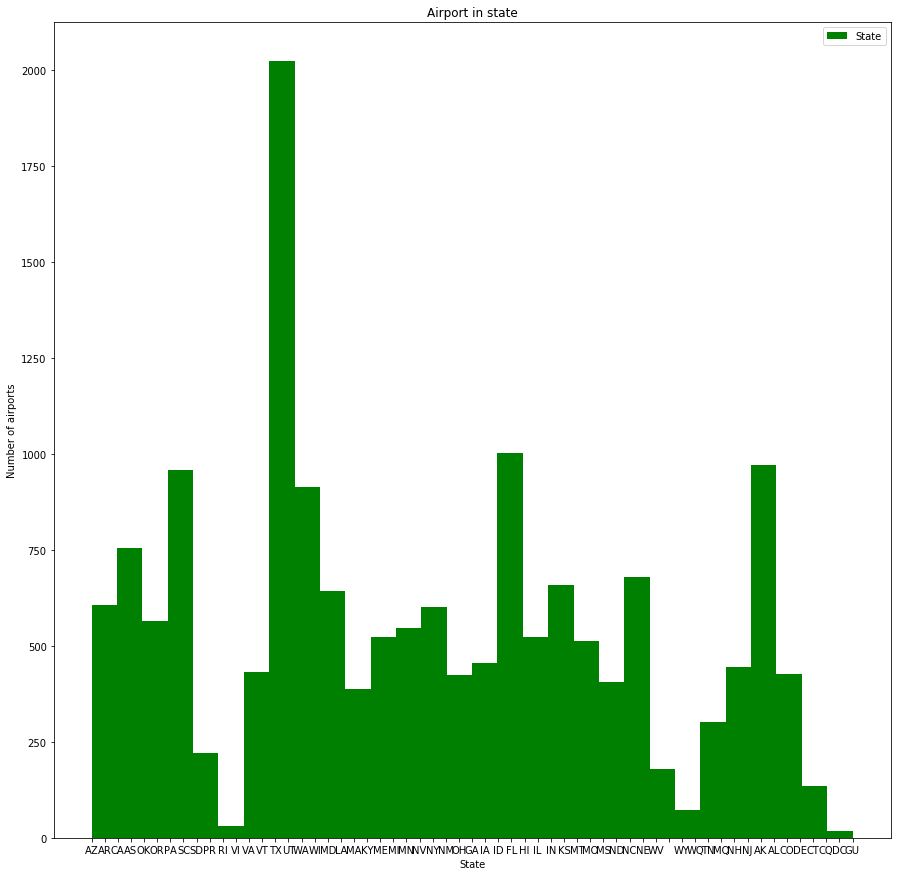

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
axes.hist(df['ST_POSTAL'], bins=30, color='g', label='State')
axes.set_title('Airport in state')
axes.set_xlabel('State')
axes.set_ylabel('Number of airports')
axes.legend()
plt.savefig('../plots/Airport_state.png', dpi=300)

Creating Scatter plot for latitude vs Longitude for each airport

No handles with labels found to put in legend.


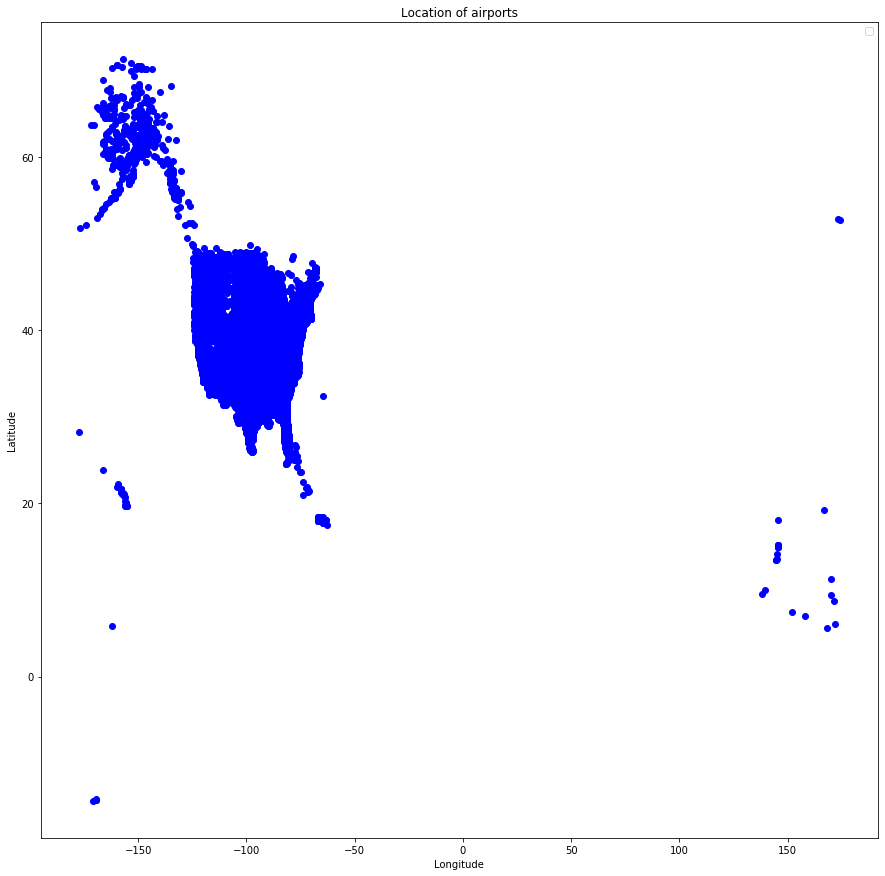

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
axes.scatter(df['LONGITUDE'], df['LATITUDE'], color='b')
axes.set_title('Location of airports')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
plt.savefig('../plots/Lat_Long.png', dpi=300)

Creating line charts for airports open data

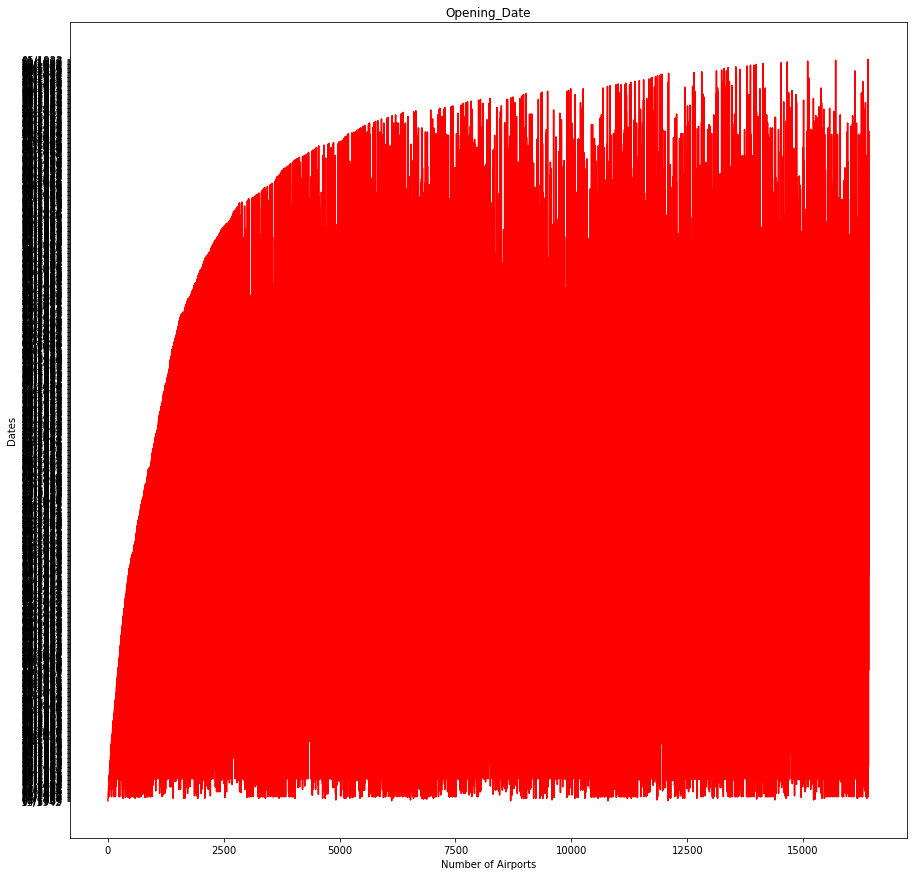

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
axes.plot(df['ACT_DATE'], color='red')
axes.set_title('Opening_Date')
axes.set_xlabel('Number of Airports')
axes.set_ylabel('Dates')
plt.savefig('../plots/Opening_Date.png', format='png')

In [33]:
new = df['ACT_DATE'].str.split("/", n = 1, expand = True)

In [37]:
new

,0,1
0,11,1942
1,04,1963
2,02,1984
3,03,1990
4,04,1944
...,...,...
16414,07,1999
16415,07,2002
16416,03,1942
16417,05,1951


Tried splitting the actual date to obtain year and use it to print the airport.unable to print it. Please help?